In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE 
import joblib

In [2]:
df=pd.read_csv('mushroom_project.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

the whole data consits of object type data

we need to covert this data into numeric

In [5]:
#class is our target variable as it shows us the valus if the mushrooms are posinous or not
df['class'].value_counts()
print('edible mushrooms : ',df['class'].value_counts()[0])
print('posinous mushrooms :',df['class'].value_counts()[1])

edible mushrooms :  4208
posinous mushrooms : 3916


we can see its a unbalanced dataset

In [6]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# Visulaization and EDA

C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

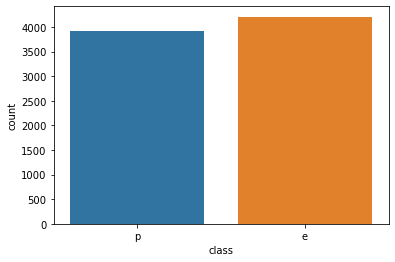

In [7]:
sns.countplot(df['class'])

<AxesSubplot:>

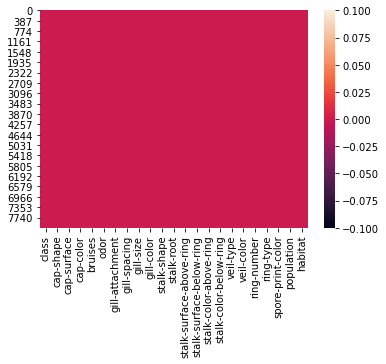

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:xlabel='cap-shape', ylabel='class'>

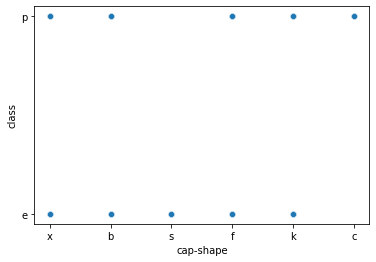

In [10]:
sns.scatterplot(x='cap-shape',y='class',data=df)

# Converting objects data into numeric

In [11]:
le=LabelEncoder()

In [12]:
for i in df.columns:
    df[i]=le.fit_transform(df[i])

In [13]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


# checking correlation

In [14]:
df.corr()['class']

class                       1.000000
cap-shape                   0.052951
cap-surface                 0.178446
cap-color                  -0.031384
bruises                    -0.501530
odor                       -0.093552
gill-attachment             0.129200
gill-spacing               -0.348387
gill-size                   0.540024
gill-color                 -0.530566
stalk-shape                -0.102019
stalk-root                 -0.379361
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
veil-type                        NaN
veil-color                  0.145142
ring-number                -0.214366
ring-type                  -0.411771
spore-print-color           0.171961
population                  0.298686
habitat                     0.217179
Name: class, dtype: float64

# from the above I can conclude that columns other than bruises, odor, gill-size, stalk-surface-above-ring ,stalk-surface-below-ring , ring-type,spore-print-color can be dropped (for good correlation >=+/- 0.5)

In [15]:
df1=df[['bruises', 'odor', 'gill-size', 'stalk-surface-above-ring' ,'stalk-surface-below-ring' , 'ring-type','spore-print-color','class']]

In [16]:
df1

,bruises,odor,gill-size,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,class
0,1,6,1,2,2,4,2,1
1,1,0,0,2,2,4,3,0
2,1,3,0,2,2,4,3,0
3,1,6,1,2,2,4,2,1
4,0,5,0,2,2,0,3,0
...,...,...,...,...,...,...,...,...
8119,0,5,0,2,2,4,0,0
8120,0,5,0,2,2,4,0,0
8121,0,5,0,2,2,4,0,0
8122,0,8,1,2,1,0,7,1


# checking outliers

C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bruises'>

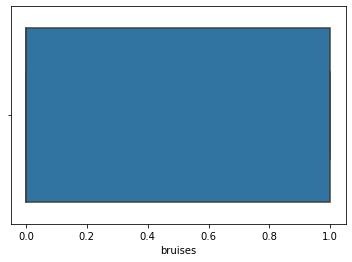

In [17]:
sns.boxplot(df['bruises'])

C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='odor'>

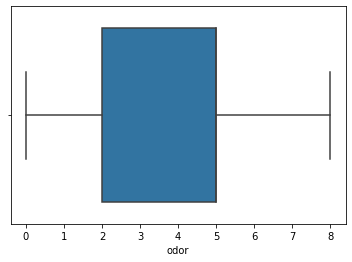

In [18]:
sns.boxplot(df['odor'])

C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gill-size'>

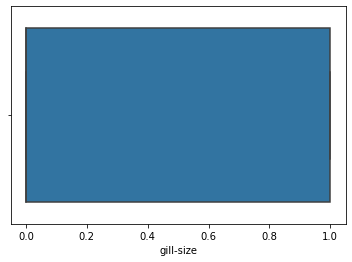

In [19]:
sns.boxplot(df['gill-size'])

C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stalk-surface-above-ring'>

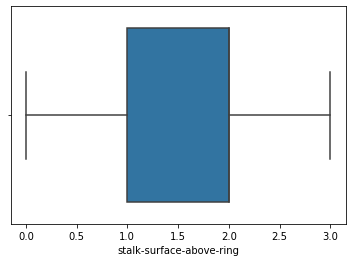

In [20]:
sns.boxplot(df['stalk-surface-above-ring'])

C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stalk-surface-below-ring'>

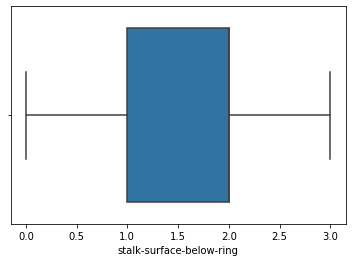

In [21]:
sns.boxplot(df['stalk-surface-below-ring'])

C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ring-type'>

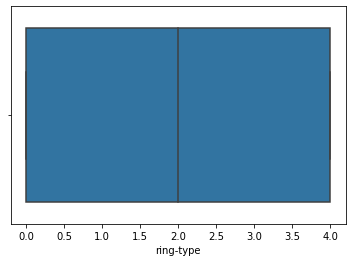

In [22]:
sns.boxplot(df['ring-type'])

C:\Users\SNAP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='spore-print-color'>

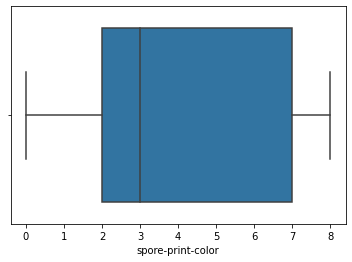

In [23]:
sns.boxplot(df['spore-print-color'])

In [24]:
df1.describe()

,bruises,odor,gill-size,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,class
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.415559,4.144756,0.309207,1.575086,1.603644,2.291974,3.596750,0.482029
std,0.492848,2.103729,0.462195,0.621459,0.675974,1.801672,2.382663,0.499708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000
50%,0.000000,5.000000,0.000000,2.000000,2.000000,2.000000,3.000000,0.000000
75%,1.000000,5.000000,1.000000,2.000000,2.000000,4.000000,7.000000,1.000000
max,1.000000,8.000000,1.000000,3.000000,3.000000,4.000000,8.000000,1.000000


# Balancing the dataset

In [25]:
df1.head()

,bruises,odor,gill-size,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,spore-print-color,class
0,1,6,1,2,2,4,2,1
1,1,0,0,2,2,4,3,0
2,1,3,0,2,2,4,3,0
3,1,6,1,2,2,4,2,1
4,0,5,0,2,2,0,3,0


In [26]:
dfx=df1.iloc[:,0:-1]
dfx.shape

(8124, 7)

In [27]:
dfy=df1.iloc[:,-1]
dfy.shape

(8124,)

In [28]:
from imblearn.over_sampling import SMOTE 
sm=SMOTE()
x,y=sm.fit_resample(dfx,dfy)

In [29]:
x.shape

(8416, 7)

In [30]:
y.shape

(8416,)

In [31]:
y.value_counts()

1    4208
0    4208
Name: class, dtype: int64

<AxesSubplot:>

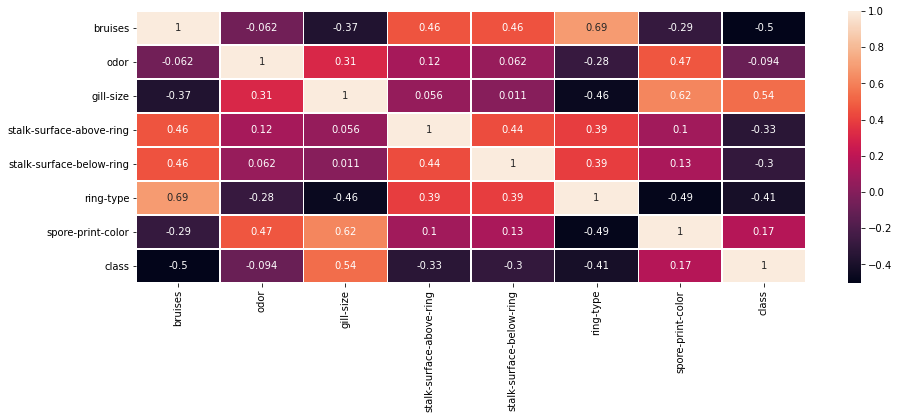

In [32]:
plt.figure(figsize=(15,5))
sns.heatmap(df1.corr(),annot=True,linewidth=0.5)

# Feature scaling

In [33]:
sc=StandardScaler()
x=sc.fit_transform(x)
x


array([[ 1.20656216,  0.87988905,  1.46779521, ...,  0.59755007,
         0.96319534, -0.66996973],
       [ 1.20656216, -1.95154591, -0.68129395, ...,  0.59755007,
         0.96319534, -0.25338567],
       [ 1.20656216, -0.53582843, -0.68129395, ...,  0.59755007,
         0.96319534, -0.25338567],
       ...,
       [-0.82880106, -1.00773426, -0.68129395, ..., -0.88417691,
        -0.14892594, -1.08655378],
       [-0.82880106,  1.8237007 ,  1.46779521, ..., -0.88417691,
        -1.26104721,  1.41295056],
       [-0.82880106,  1.8237007 ,  1.46779521, ..., -0.88417691,
        -1.26104721,  1.41295056]])

In [34]:
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6
0,1.206562,0.879889,1.467795,0.696145,0.597550,0.963195,-0.669970
1,1.206562,-1.951546,-0.681294,0.696145,0.597550,0.963195,-0.253386
2,1.206562,-0.535828,-0.681294,0.696145,0.597550,0.963195,-0.253386
3,1.206562,0.879889,1.467795,0.696145,0.597550,0.963195,-0.669970
4,-0.828801,0.407983,-0.681294,0.696145,0.597550,-1.261047,-0.253386
...,...,...,...,...,...,...,...
8411,-0.828801,-1.007734,1.467795,0.696145,-0.884177,-1.261047,1.412951
8412,-0.828801,-1.007734,-0.681294,-0.914731,-0.884177,-0.148926,-1.086554
8413,-0.828801,-1.007734,-0.681294,-0.914731,-0.884177,-0.148926,-1.086554
8414,-0.828801,1.823701,1.467795,0.696145,-0.884177,-1.261047,1.412951


In [35]:
lg=LogisticRegression()

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=45)

In [36]:
lg.fit(xtrain,ytrain)
lg.score(xtrain,ytrain)

0.9095365418894831

In [37]:
for i in range(0,1000):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=i)
    lg.fit(xtrain,ytrain)
    pred_train=lg.predict(xtrain)
    pred_test=lg.predict(xtest)
    if round(accuracy_score(ytrain,pred_train)*100,1)==round(accuracy_score(ytest,pred_test)*100,1):
        print('At random state :- ',i)
        print('testing r2 score is :',accuracy_score(ytrain,pred_train)*100)
        print('testing r2 score is :',accuracy_score(ytest,pred_test)*100)

At random state :-  19
testing r2 score is : 91.01307189542483
testing r2 score is : 91.0332541567696
At random state :-  50
testing r2 score is : 91.01307189542483
testing r2 score is : 91.0332541567696
At random state :-  64
testing r2 score is : 89.86928104575163
testing r2 score is : 89.90498812351544
At random state :-  71
testing r2 score is : 91.02792632204397
testing r2 score is : 90.97387173396675
At random state :-  83
testing r2 score is : 91.02792632204397
testing r2 score is : 90.97387173396675
At random state :-  129
testing r2 score is : 91.02792632204397
testing r2 score is : 90.97387173396675
At random state :-  131
testing r2 score is : 91.01307189542483
testing r2 score is : 91.0332541567696
At random state :-  138
testing r2 score is : 91.01307189542483
testing r2 score is : 91.0332541567696
At random state :-  145
testing r2 score is : 91.01307189542483
testing r2 score is : 91.0332541567696
At random state :-  165
testing r2 score is : 91.02792632204397
testing r2

choosing random state 47

In [38]:
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier() 
svc=SVC()
abc=AdaBoostClassifier()
gb=GradientBoostingClassifier()


model=[lg,dtc,knn,rfc,svc,abc,gb]

In [46]:
score=cross_val_score(dtc,x,y,cv=9)
print(score)
print(score.mean())

[1.         1.         1.         1.         1.         1.
 1.         0.78181818 1.        ]
0.9757575757575757


In [48]:
score=cross_val_score(knn,x,y,cv=9)
print(score)
print(score.mean())

[1.        1.        1.        1.        1.        1.        1.
 0.9486631 1.       ]
0.9942959001782532


In [39]:
for m in model:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    predm=m.predict(xtest)
    print('Accuracy score of ',m,'is')
    print(accuracy_score(ytest,predm))
    print(confusion_matrix(ytest,predm))
    print(classification_report(ytest,predm))
    print('\n')

Accuracy score of  LogisticRegression() is
0.9144893111638955
[[772  97]
 [ 47 768]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       869
           1       0.89      0.94      0.91       815

    accuracy                           0.91      1684
   macro avg       0.92      0.92      0.91      1684
weighted avg       0.92      0.91      0.91      1684



Accuracy score of  DecisionTreeClassifier() is
1.0
[[869   0]
 [  0 815]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       869
           1       1.00      1.00      1.00       815

    accuracy                           1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684



Accuracy score of  KNeighborsClassifier() is
1.0
[[869   0]
 [  0 815]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       869
  

# saving the best model


In [49]:
joblib.dump(knn,'knnfile.obj')

['knnfile.obj']